# Session 2: Unsupervised Learning and Data Preprocessing

Welcome to Session 2! Now that we’ve learned about supervised learning and built our first classifier using a decision tree, we’ll dive into unsupervised learning today. We’ll also learn about data preprocessing, which is a crucial step in preparing your data before feeding it to a machine learning model. This session will be packed with new concepts and hands-on coding, so let’s get started!

1. Introduction to Unsupervised Learning

**What is Unsupervised Learning?**
Unsupervised learning is a type of machine learning where the model is trained on data that has no labels. Unlike supervised learning, we don’t tell the model what the correct output should be. Instead, the algorithm tries to discover hidden patterns or structures in the data.



![](https://eastgate-software.com/wp-content/uploads/2023/10/Unsupervised-Learning-Clustering.png)

>  The two most common unsupervised learning tasks are:
* Clustering: Grouping data points into clusters (e.g., K-Means clustering).
* Dimensionality Reduction: Reducing the number of features while keeping the most important information (e.g., PCA).


What is Clustering? Clustering is the process of dividing a dataset into groups, where the data points in each group are more similar to each other than to those in other groups. This is useful when you want to discover patterns in data that you don’t already know, like identifying different customer segments.

![](https://waterprogramming.wordpress.com/wp-content/uploads/2022/03/graphic.png?w=1024)

What is K-Means? K-Means is one of the most popular clustering algorithms. It works by dividing the data into K clusters, where each cluster is represented by a centroid. The algorithm iteratively updates the centroids until the data points are assigned to the nearest centroid.


![](https://miro.medium.com/v2/resize:fit:1017/1*vNng_oOsNRHKrlh3pjSAyA.png)

2. Data Preprocessing

Before we can apply any machine learning algorithm, we need to preprocess our data. Data preprocessing is one of the most critical steps in any machine learning workflow. In this section, we will handle missing data, scale the features, and select relevant features for clustering.



Step 1: Load the Wine Dataset

We’ll use the Wine dataset, which contains chemical properties of wine samples.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Preview the dataset
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


The dataset consists of features such as alcohol content, magnesium, flavonoids, and other chemical properties of wines.



Step 2: Handling Missing Data

What is Missing Data? I

In real-world data, missing values are quite common. Machine learning algorithms cannot work with missing data, so we need to handle it before proceeding.

There are several strategies for handling missing data:

* Remove rows with missing values: If only a few rows are missing data.
* Impute missing values: Replace missing data with the mean, median, or a custom value.

How to Check for Missing Data:

In [2]:
# Check for missing data
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

If there were missing values, we would handle them as follows:

In [3]:
# Impute missing values with the mean (if any)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify that missing values have been handled
df_imputed.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Step 3: Feature Scaling

What is Feature Scaling?

In datasets, different features can have different scales. For instance, in the Wine dataset, the alcohol feature might range from 10 to 14, while magnesium might range from 70 to 160. To ensure that no feature dominates the clustering process, we need to standardize the features.

There are two common types of scaling:

* Standardization: Centers the data around 0 with a standard deviation of 1.
* Normalization: Rescales the data to a range of [0, 1].


For clustering, we’ll standardize the data.


![](https://miro.medium.com/v2/resize:fit:890/1*9j33xl7N74uvn2uy1xqG7A.png)

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame for easier interpretation
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Step 4: Feature Selection

What is Feature Selection?

Not all features are always relevant or useful for a given task. Feature selection helps you identify the most important features and remove irrelevant or redundant ones. This reduces the complexity of the model and often improves performance.

For this example, we’ll assume that we have domain knowledge and know which features are important. Alternatively, you could use automated methods like Recursive Feature Elimination (RFE) or feature importance scores.



![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F2dc2b4b4-a454-4aba-adb8-a9d662ba478a_1922x1511.jpeg)

In [5]:
# Select a subset of features based on domain knowledge (for demonstration)
df_selected = df_scaled[['alcohol', 'flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines']]

# Preview the selected features
df_selected.head()


,alcohol,flavanoids,total_phenols,od280/od315_of_diluted_wines
0,1.518613,1.034819,0.808997,1.847920
1,0.246290,0.733629,0.568648,1.113449
2,0.196879,1.215533,0.808997,0.788587
3,1.691550,1.466525,2.491446,1.184071
4,0.295700,0.663351,0.808997,0.449601


In this case, we’re selecting features like alcohol content, flavonoids, and total phenols, which are critical in distinguishing different types of wine.

3. Clustering with K-Means

Now that our data is preprocessed, we can apply the K-Means algorithm to group the wines into clusters.

**What is K-Means?**

K-Means is a clustering algorithm that divides the data into K clusters. The algorithm works by assigning each data point to the nearest cluster and iteratively updating the cluster centers until convergence.



![](https://serokell.io/files/q4/q49pm3tx.K-Means_Clustering_Algorithm_pic1_(1).png)

Step 1: Apply K-Means

We’ll use K-Means to cluster the wines into 3 groups (since there are 3 types of wine in the dataset).

In [6]:
from sklearn.cluster import KMeans

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_selected)

# Add the cluster labels to the original dataset
df['cluster'] = kmeans.labels_

# Preview the dataset with cluster labels
df.head()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


Step 2: Visualize the Clusters


Visualizing clusters helps us better understand how the data is grouped. Since we have many features, we’ll visualize the clusters based on just two features: alcohol and flavanoids.



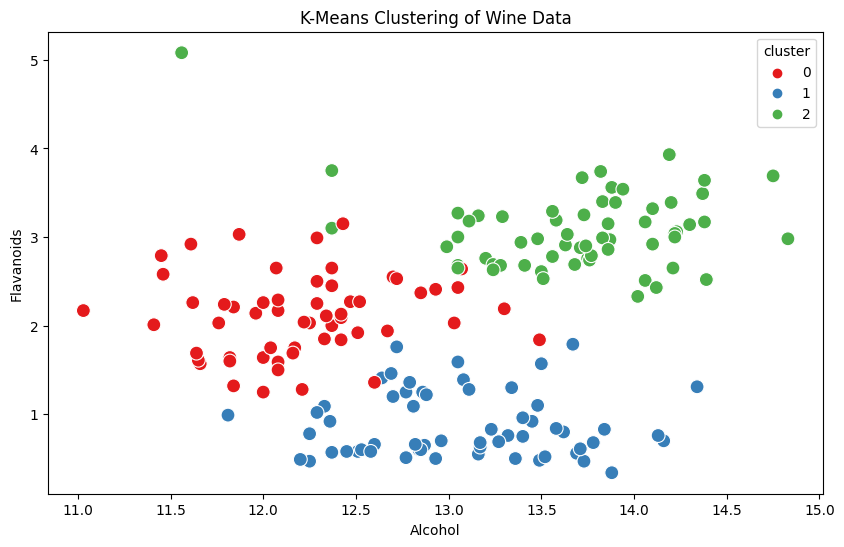

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters based on alcohol and flavanoids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['alcohol'], y=df['flavanoids'], hue=df['cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()


4. Dimensionality Reduction with PCA


What is Dimensionality Reduction?

Dimensionality reduction techniques like PCA help reduce the number of features in a dataset while retaining as much important information as possible. This is particularly useful for visualization and computational efficiency.

![](http://)![](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

What is PCA?

PCA transforms the original features into a set of new features (called principal components), which capture the most variance in the data. The goal is to reduce the number of dimensions while keeping the data’s structure intact.

![](https://miro.medium.com/v2/resize:fit:596/1*QinDfRawRskupf4mU5bYSA.png)

Step 1: Apply PCA

We’ll apply PCA to reduce the 13-dimensional Wine dataset to 2 dimensions for visualization.



In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

Step 2: Visualize the PCA Components

We can now visualize the data in 2D space after applying PCA, while coloring the data points by their cluster labels.



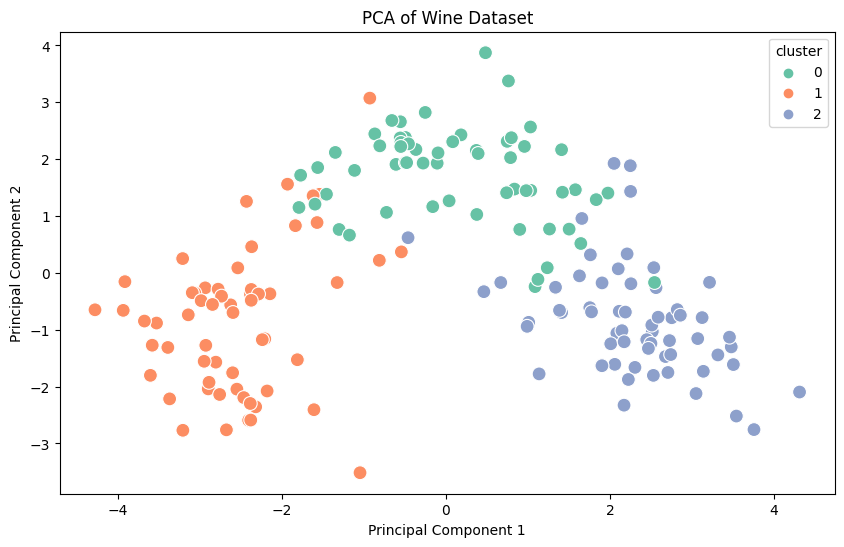

In [9]:
# Visualize the PCA components and the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['cluster'], palette='Set2', s=100)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


This plot shows how the wines are grouped into clusters after PCA reduction, making it easier to visualize in 2D.

5. Summary of Session 2


In this session, we covered:

* Unsupervised Learning, focusing on clustering and dimensionality reduction.
* Key data preprocessing techniques like handling missing data, feature scaling, and feature selection.
* Applied K-Means Clustering to group the wines into 3 clusters based on their chemical properties.
* Used PCA to reduce the dimensionality of the dataset for easier visualization.

By the end of this session, you should feel confident with data preprocessing, clustering, and dimensionality reduction techniques, and how to apply them to real-world data.

